First, import the libraries and load the dataset:

In [22]:
# Import all libraries I need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

2.1 Loading the Data: I started by loading the wine quality dataset into Python. This dataset comes in two separate CSV files - one for red wines and one for white wines. I needed to load both files and combine them into a single dataset for analysis.
In the output we can see the data loaded correctly. I have 6497 wines with 13 columns.

In [23]:
# Load red wine data
red_wine = pd.read_csv('winequality-red.csv', sep=';')
red_wine['type'] = 'red'

# Load white wine data  
white_wine = pd.read_csv('winequality-white.csv', sep=';')
white_wine['type'] = 'white'

# Combine both datasets
wine_data = pd.concat([red_wine, white_wine], axis=0)

# Check the data
print("Dataset shape:", wine_data.shape)
print("\nFirst few rows:")
print(wine_data.head())

Dataset shape: (6497, 13)

First few rows:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality type  
0      9.4      

======================================================================

2.2 Basic Information about the data: I checked the general information of the dataset

In [24]:
print("Dataset Information:")
print(wine_data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB
None


In [25]:
print("Basic Statistics:")
print(wine_data.describe())

Basic Statistics:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000            

======================================================================

2.3 checking for missing values:

In [26]:
# Check missing values
print("Missing Values:")
print(wine_data.isnull().sum())

Missing Values:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64


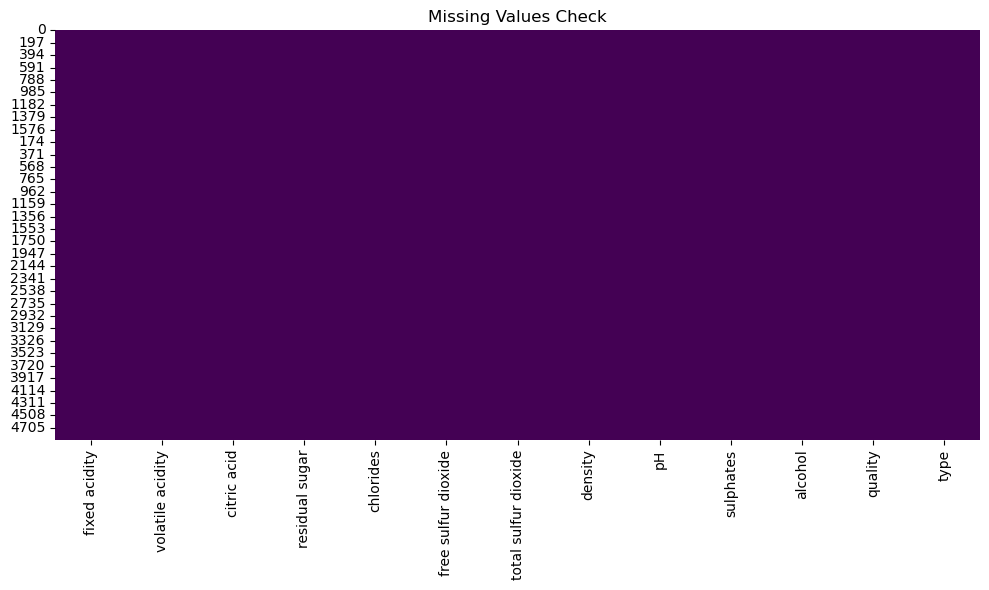

In [27]:
# Visualize missing values
plt.figure(figsize=(10,6))
sns.heatmap(wine_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Check')
plt.tight_layout()
plt.show()

======================================================================

2.4 Understanding the Target Variable: In this step, I looked at the distribution of the target variable, which is the quality of the wine. I counted how many wines have each quality score:

In [60]:
# Check quality distribution
print("Quality Distribution:")
print(wine_data['quality'].value_counts().sort_index())

Quality Distribution:
quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: count, dtype: int64


======================================================================

Then I made a bar chart to visualize it:

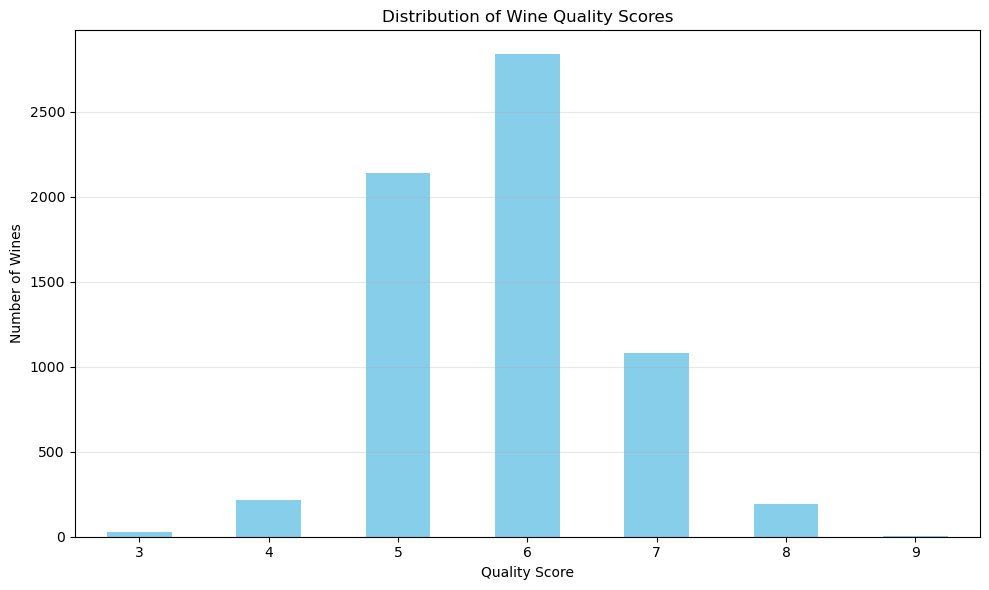

In [29]:
# Plot quality distribution
plt.figure(figsize=(10,6))
wine_data['quality'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Wine Quality Scores')
plt.xlabel('Quality Score')
plt.ylabel('Number of Wines')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

======================================================================

Now I will convert this to binary classification:

In [30]:
# Create binary target: quality <= 5 is "bad", quality > 5 is "good"
wine_data['quality_binary'] = wine_data['quality'].apply(lambda x: 1 if x > 5 else 0)

In [31]:
# Check the new target
print("Binary Quality Distribution:")
print(wine_data['quality_binary'].value_counts())
print("\nPercentage:")
print(wine_data['quality_binary'].value_counts(normalize=True) * 100)

Binary Quality Distribution:
quality_binary
1    4113
0    2384
Name: count, dtype: int64

Percentage:
quality_binary
1    63.306141
0    36.693859
Name: proportion, dtype: float64


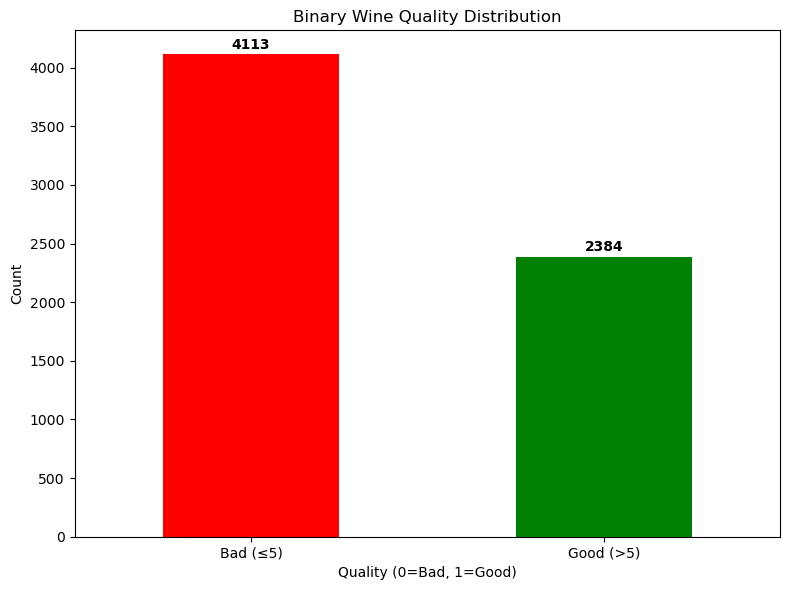

In [32]:
# Visualize binary target
plt.figure(figsize=(8,6))
wine_data['quality_binary'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title('Binary Wine Quality Distribution')
plt.xlabel('Quality (0=Bad, 1=Good)')
plt.ylabel('Count')
plt.xticks([0,1], ['Bad (≤5)', 'Good (>5)'], rotation=0)
for i, v in enumerate(wine_data['quality_binary'].value_counts()):
    plt.text(i, v+50, str(v), ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

======================================================================

2.5 Distribution of Features:

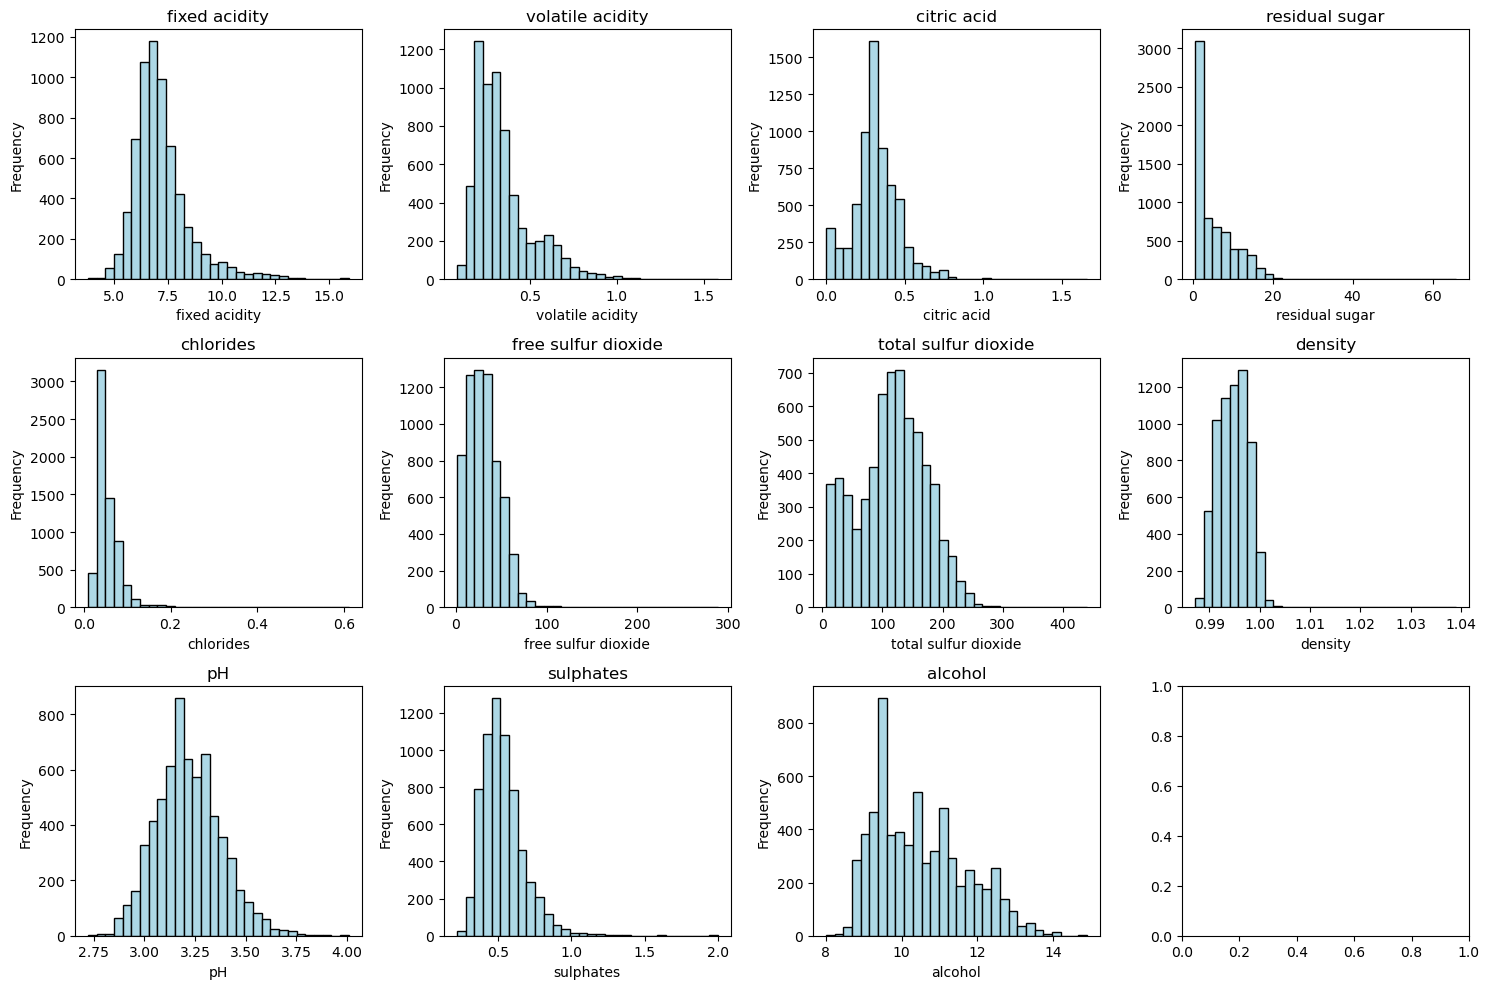

In [33]:
# Plot distribution of all numerical features
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
axes = axes.flatten()

numerical_cols = wine_data.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_cols.remove('quality')
numerical_cols.remove('quality_binary')

for i, col in enumerate(numerical_cols):
    axes[i].hist(wine_data[col], bins=30, color='lightblue', edgecolor='black')
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

======================================================================

2.6 Checking Wine Types: I first checked how many samples belong to each wine type. The dataset contains both red and white wines, and the value counts show that one type appears more often than the other:

In [34]:
# Check red vs white distribution
print("Wine Type Distribution:")
print(wine_data['type'].value_counts())

Wine Type Distribution:
type
white    4898
red      1599
Name: count, dtype: int64


======================================================================

Next, I compared the quality scores of red and white wines by using a count plot. This plot shows how the quality is distributed for each wine type. It helps us see whether one type usually has higher or lower quality compared to the other:

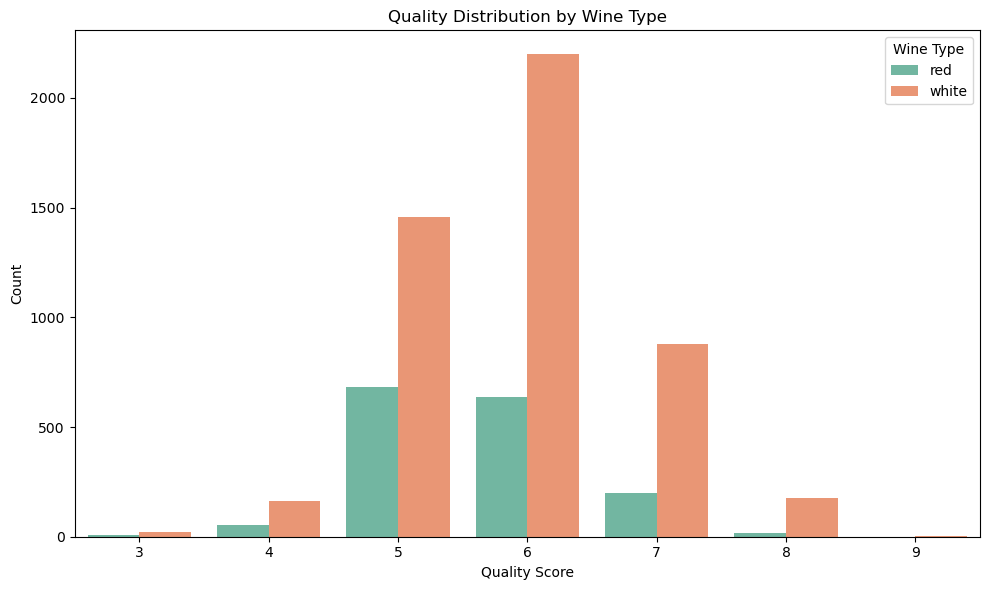

In [35]:
# Compare quality between red and white wines
plt.figure(figsize=(10,6))
sns.countplot(data=wine_data, x='quality', hue='type', palette='Set2')
plt.title('Quality Distribution by Wine Type')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.legend(title='Wine Type')
plt.tight_layout()
plt.show()

======================================================================

2.7 Correlation Analysis:
The correlation matrix shows how strongly each pair of features is related.
A positive value means the two variables increase together, and a negative value means one increases while the other decreases.

In [36]:
# Calculate correlation matrix
correlation = wine_data[numerical_cols + ['quality_binary']].corr()

======================================================================

The heatmap makes it easy to see which features have strong or weak relationships.
Strong correlations appear in darker colors, while weak correlations appear lighter:

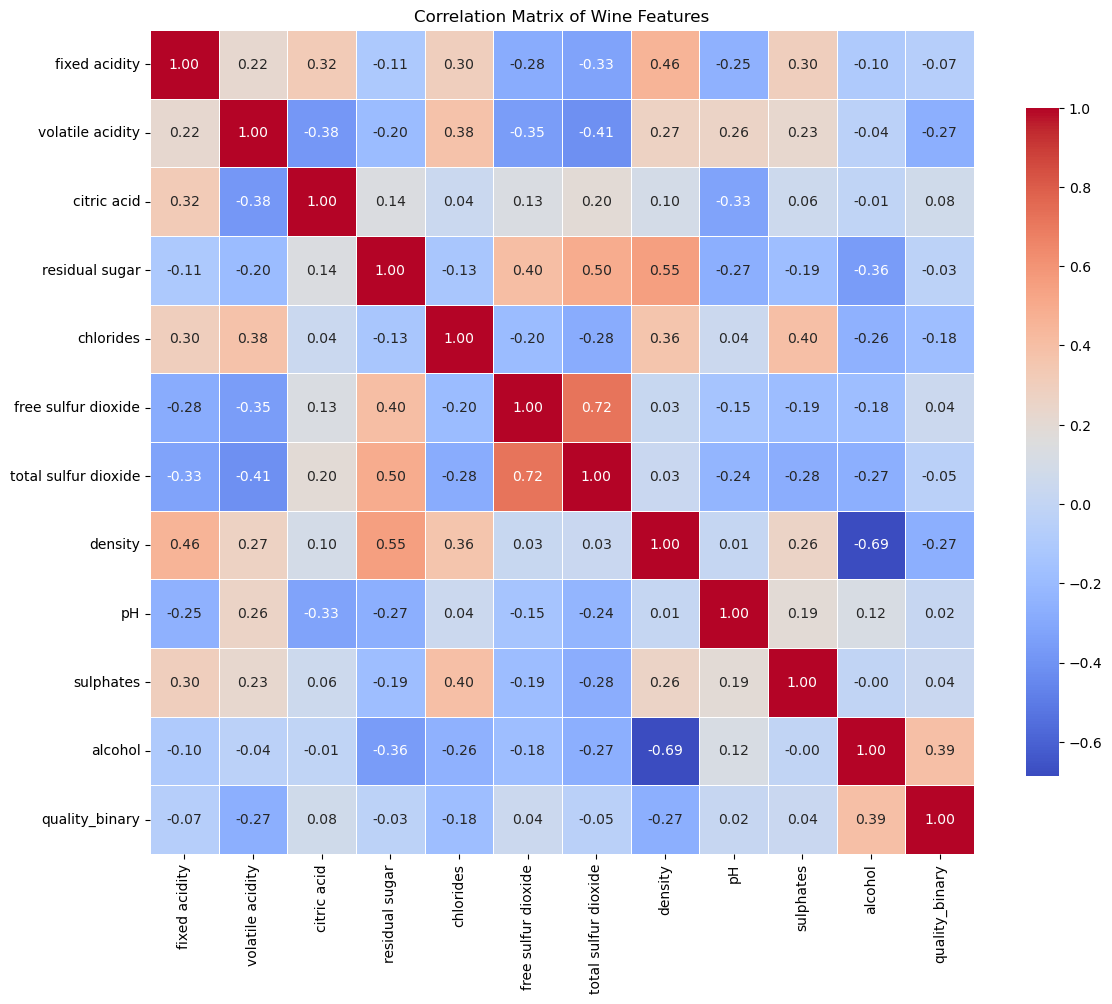

In [37]:
# Plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Wine Features')
plt.tight_layout()
plt.show()

This part helps identify which chemical properties are most important for predicting whether a wine is “good” or “bad.” Features with higher positive correlation may help increase the predicted quality, while features with negative correlation may be linked to lower quality.

In [38]:
# Show correlation with target
print("Correlation with quality_binary:")
print(correlation['quality_binary'].sort_values(ascending=False))

Correlation with quality_binary:
quality_binary          1.000000
alcohol                 0.394676
citric acid             0.075739
free sulfur dioxide     0.044819
sulphates               0.035807
pH                      0.018842
residual sugar         -0.032484
total sulfur dioxide   -0.047585
fixed acidity          -0.067354
chlorides              -0.181908
volatile acidity       -0.267046
density                -0.268876
Name: quality_binary, dtype: float64


======================================================================

2.8Comparing Features by Quality: In this step, I used box plots to compare the numerical features of good and bad wines. The box plots show how the values of each feature are spread in the two groups (0 = bad, 1 = good):

C:\Users\Green\AppData\Local\Temp\ipykernel_18996\2170196835.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=wine_data, x='quality_binary', y=col, ax=axes[i], palette='Set3')
C:\Users\Green\AppData\Local\Temp\ipykernel_18996\2170196835.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=wine_data, x='quality_binary', y=col, ax=axes[i], palette='Set3')
C:\Users\Green\AppData\Local\Temp\ipykernel_18996\2170196835.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=wine_data, x='quality_binary', y=col, ax=axes[i], palette='Se

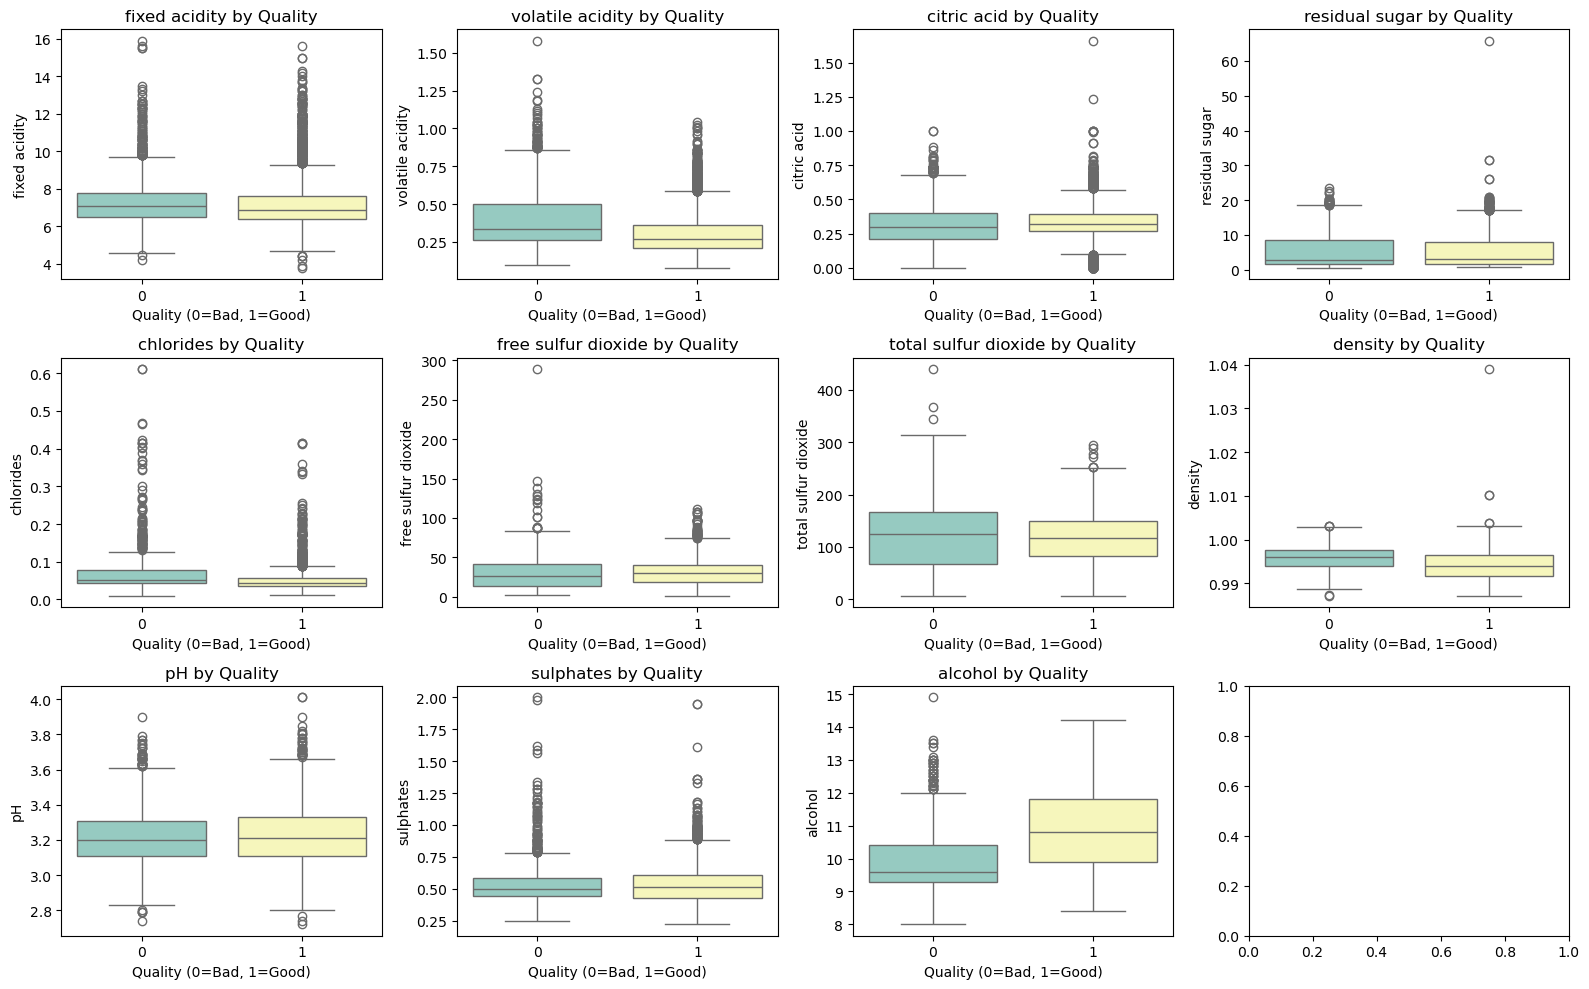

In [39]:
# Box plots to compare good vs bad quality wines
fig, axes = plt.subplots(3, 4, figsize=(16, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(data=wine_data, x='quality_binary', y=col, ax=axes[i], palette='Set3')
    axes[i].set_title(f'{col} by Quality')
    axes[i].set_xlabel('Quality (0=Bad, 1=Good)')

plt.tight_layout()
plt.show()

======================================================================

Outlier Detection Using the IQR Method: Outlier detection is important because extreme values can affect model performance and make the data less reliable.

In [40]:
# Check outliers using IQR method
print("Outliers Detection:")
for col in numerical_cols:
    Q1 = wine_data[col].quantile(0.25)
    Q3 = wine_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = wine_data[(wine_data[col] < lower_bound) | (wine_data[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")

Outliers Detection:
fixed acidity: 357 outliers
volatile acidity: 377 outliers
citric acid: 509 outliers
residual sugar: 118 outliers
chlorides: 286 outliers
free sulfur dioxide: 62 outliers
total sulfur dioxide: 10 outliers
density: 3 outliers
pH: 73 outliers
sulphates: 191 outliers
alcohol: 3 outliers


======================================================================

3.1 Data Preprocessing: In this step, I prepared the dataset for the machine learning model.

In [41]:
# Remove the original quality column (keep only binary)
wine_data_clean = wine_data.drop('quality', axis=1)

In [42]:
# Convert wine type to numerical (0 for red, 1 for white)
wine_data_clean['type'] = wine_data_clean['type'].map({'red': 0, 'white': 1})

In [43]:
print("Data after preprocessing:")
print(wine_data_clean.head())
print("\nData shape:", wine_data_clean.shape)
print("\nData types:")
print(wine_data_clean.dtypes)

Data after preprocessing:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  type  quality_binary  
0      9.4     0         

======================================================================

3.2 Separating Features and Target: This step is important because machine learning models require a clear separation between the input data and the target variable before training.

In [44]:
# Separate features (X) and target (y)
X = wine_data_clean.drop('quality_binary', axis=1)
y = wine_data_clean['quality_binary']

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("\nFeature names:")
print(X.columns.tolist())

Features shape: (6497, 12)
Target shape: (6497,)

Feature names:
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'type']


======================================================================

3.3 Splitting the Data into Training and Testing Sets:

In [45]:
# Split data into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])
print("\nTraining set target distribution:")
print(y_train.value_counts())
print("\nTesting set target distribution:")
print(y_test.value_counts())

Training set size: 4547
Testing set size: 1950

Training set target distribution:
quality_binary
1    2879
0    1668
Name: count, dtype: int64

Testing set target distribution:
quality_binary
1    1234
0     716
Name: count, dtype: int64


======================================================================

3.4 Feature Scaling with StandardScaler: Machine learning models often work better when all features are on a similar scale.
This step helps the model train more effectively, especially for algorithms that are sensitive to feature magnitude.

In [46]:
# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame to see the results
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

print("Scaled training data (first 5 rows):")
print(X_train_scaled_df.head())
print("\nScaled data statistics:")
print(X_train_scaled_df.describe())

Scaled training data (first 5 rows):
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.100371          0.584855    -0.326293        0.632267   0.005834   
1       0.126424          1.780585    -1.007182       -0.002842   3.019574   
2      -0.175969         -0.610876     1.307839        1.182694  -0.754389   
3       1.411593         -0.730449    -0.530560       -0.701462   0.576001   
4      -1.234344         -0.491303    -2.164693        1.013332  -0.510032   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             1.654545              0.809817 -0.720501 -0.358824  -1.138477   
1             1.208900             -0.286514  0.867007  0.383672  -0.221988   
2             1.376017              1.994562  0.581985 -1.163196   0.498110   
3            -1.632089             -1.524306  1.410538  1.188043   2.200159   
4            -0.963621             -0.056638 -0.528277  1.373668  -0.483842   

    alcohol      ty

======================================================================

4.2 Training Logistic Regression:

In [48]:
# Create and train Logistic Regression model
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred_lr = lr_model.predict(X_train_scaled)
y_test_pred_lr = lr_model.predict(X_test_scaled)

print("Logistic Regression Model Training Complete!")
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_lr))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred_lr))

Logistic Regression Model Training Complete!
Training Accuracy: 0.745546514185177
Testing Accuracy: 0.7353846153846154


======================================================================

4.3 Training Decision Tree:

In [49]:
# Create and train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train_scaled, y_train)

# Make predictions  
y_train_pred_dt = dt_model.predict(X_train_scaled)
y_test_pred_dt = dt_model.predict(X_test_scaled)

print("Decision Tree Model Training Complete!")
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_dt))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred_dt))

Decision Tree Model Training Complete!
Training Accuracy: 0.7703980646580163
Testing Accuracy: 0.7271794871794872


======================================================================

I set max_depth=5 to prevent the tree from becoming too complex and overfitting. Let me check what happens with different max_depth values:

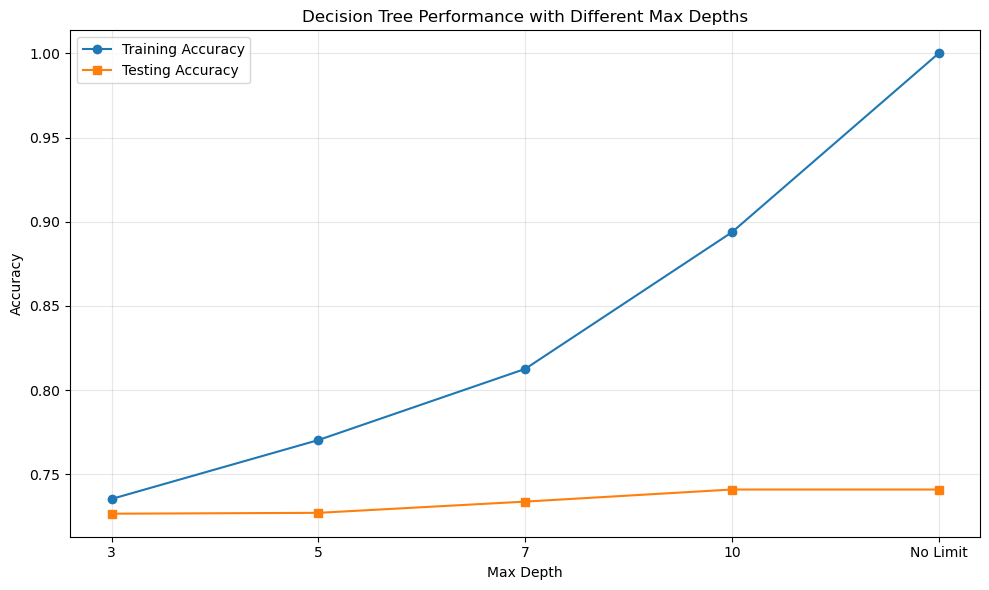

In [50]:
# Try different max_depth values
depths = [3, 5, 7, 10, None]
train_acc = []
test_acc = []

for depth in depths:
    dt = DecisionTreeClassifier(random_state=42, max_depth=depth)
    dt.fit(X_train_scaled, y_train)
    train_acc.append(accuracy_score(y_train, dt.predict(X_train_scaled)))
    test_acc.append(accuracy_score(y_test, dt.predict(X_test_scaled)))
    
# Plot results
plt.figure(figsize=(10,6))
x_labels = ['3', '5', '7', '10', 'No Limit']
plt.plot(x_labels, train_acc, marker='o', label='Training Accuracy')
plt.plot(x_labels, test_acc, marker='s', label='Testing Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Performance with Different Max Depths')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

From this graph I can see that max_depth=5 gives good balance between training and testing accuracy. Higher depths cause overfitting (training accuracy increases but testing decreases).

======================================================================

5-1 Calculating Performance Metrics:

In [51]:
# Calculate metrics for Logistic Regression
lr_acc = accuracy_score(y_test, y_test_pred_lr)
lr_prec = precision_score(y_test, y_test_pred_lr)
lr_rec = recall_score(y_test, y_test_pred_lr)
lr_f1 = f1_score(y_test, y_test_pred_lr)

# Calculate metrics for Decision Tree
dt_acc = accuracy_score(y_test, y_test_pred_dt)
dt_prec = precision_score(y_test, y_test_pred_dt)
dt_rec = recall_score(y_test, y_test_pred_dt)
dt_f1 = f1_score(y_test, y_test_pred_dt)

# Create comparison table
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Logistic Regression': [lr_acc, lr_prec, lr_rec, lr_f1],
    'Decision Tree': [dt_acc, dt_prec, dt_rec, dt_f1]
})

print("Performance Comparison:")
print(results)

Performance Comparison:
      Metric  Logistic Regression  Decision Tree
0   Accuracy             0.735385       0.727179
1  Precision             0.759768       0.768760
2     Recall             0.850891       0.813614
3   F1-Score             0.802752       0.790551


By looking at the comparison table, we can clearly see the strengths and weaknesses of each model. This helps decide which model is more suitable for predicting wine quality.

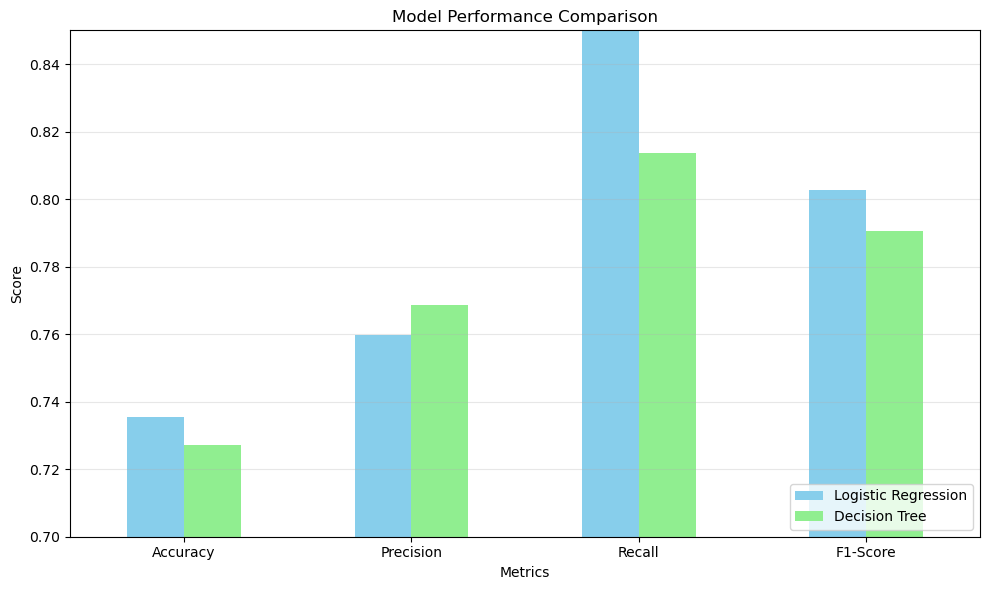

In [52]:
# Plot comparison
results_plot = results.set_index('Metric')
results_plot.plot(kind='bar', figsize=(10,6), rot=0, color=['skyblue', 'lightgreen'])
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.ylim(0.7, 0.85)
plt.legend(loc='lower right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

======================================================================

5.2 Confusion Matrix:

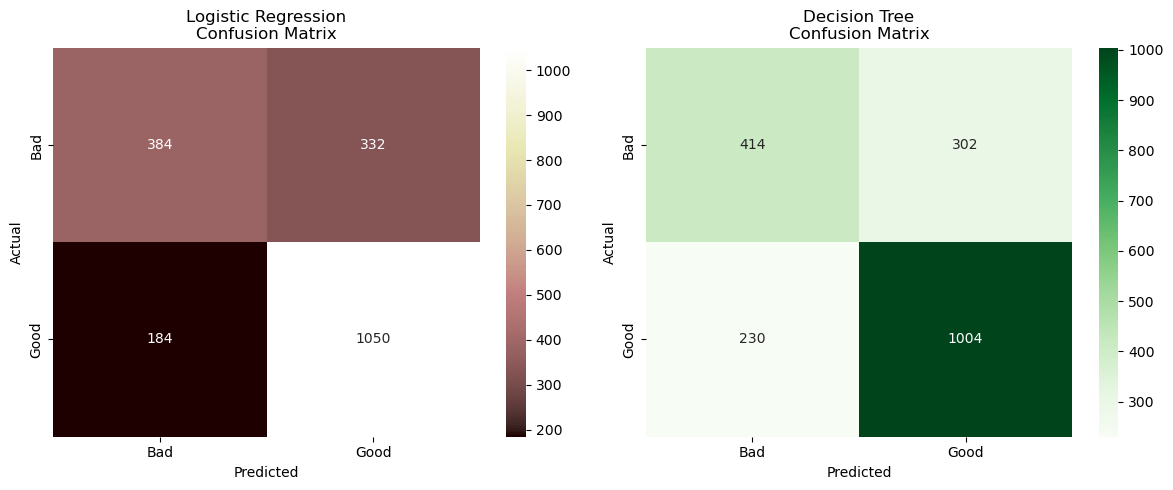


Logistic Regression:
True Negatives (correctly predicted bad): 384
False Positives (predicted good but actually bad): 332
False Negatives (predicted bad but actually good): 184
True Positives (correctly predicted good): 1050

Decision Tree:
True Negatives (correctly predicted bad): 414
False Positives (predicted good but actually bad): 302
False Negatives (predicted bad but actually good): 230
True Positives (correctly predicted good): 1004


In [53]:
# Calculate confusion matrices
cm_lr = confusion_matrix(y_test, y_test_pred_lr)
cm_dt = confusion_matrix(y_test, y_test_pred_dt)

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Logistic Regression
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='pink', ax=axes[0])
axes[0].set_title('Logistic Regression\nConfusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_xticklabels(['Bad', 'Good'])
axes[0].set_yticklabels(['Bad', 'Good'])

# Decision Tree
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Decision Tree\nConfusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_xticklabels(['Bad', 'Good'])
axes[1].set_yticklabels(['Bad', 'Good'])

plt.tight_layout()
plt.show()

# Print detailed numbers
print("\nLogistic Regression:")
print(f"True Negatives (correctly predicted bad): {cm_lr[0,0]}")
print(f"False Positives (predicted good but actually bad): {cm_lr[0,1]}")
print(f"False Negatives (predicted bad but actually good): {cm_lr[1,0]}")
print(f"True Positives (correctly predicted good): {cm_lr[1,1]}")

print("\nDecision Tree:")
print(f"True Negatives (correctly predicted bad): {cm_dt[0,0]}")
print(f"False Positives (predicted good but actually bad): {cm_dt[0,1]}")
print(f"False Negatives (predicted bad but actually good): {cm_dt[1,0]}")
print(f"True Positives (correctly predicted good): {cm_dt[1,1]}")

In [73]:
#Insight: Both models correctly identify most good wines (TP~1000) but struggle with bad wines. False Positives (~300) exceed False Negatives (~184)

======================================================================

5.3 Classification Report:

In [55]:
# Get detailed classification reports
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_test_pred_lr, target_names=['Bad Quality', 'Good Quality']))

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_test_pred_dt, target_names=['Bad Quality', 'Good Quality']))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

 Bad Quality       0.68      0.54      0.60       716
Good Quality       0.76      0.85      0.80      1234

    accuracy                           0.74      1950
   macro avg       0.72      0.69      0.70      1950
weighted avg       0.73      0.74      0.73      1950


Decision Tree Classification Report:
              precision    recall  f1-score   support

 Bad Quality       0.64      0.58      0.61       716
Good Quality       0.77      0.81      0.79      1234

    accuracy                           0.73      1950
   macro avg       0.71      0.70      0.70      1950
weighted avg       0.72      0.73      0.72      1950



======================================================================

5.4 Feature Importance :I want to check which features are most important for each model.

In [56]:
# Get feature importance from Logistic Regression coefficients
lr_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_[0]
}).sort_values('Coefficient', ascending=False)

print("Logistic Regression Feature Importance:")
print(lr_importance)

Logistic Regression Feature Importance:
                 Feature  Coefficient
10               alcohol     0.993414
3         residual sugar     0.615688
9              sulphates     0.291648
5    free sulfur dioxide     0.221453
0          fixed acidity     0.166898
8                     pH     0.114216
4              chlorides    -0.054426
2            citric acid    -0.096787
6   total sulfur dioxide    -0.303863
11                  type    -0.317156
7                density    -0.409454
1       volatile acidity    -0.857930


From Logistic Regression:
Alcohol is the most important feature (positive effect on quality)
Volatile acidity has the most negative effect (more acid = lower quality)
Density also negatively affects quality

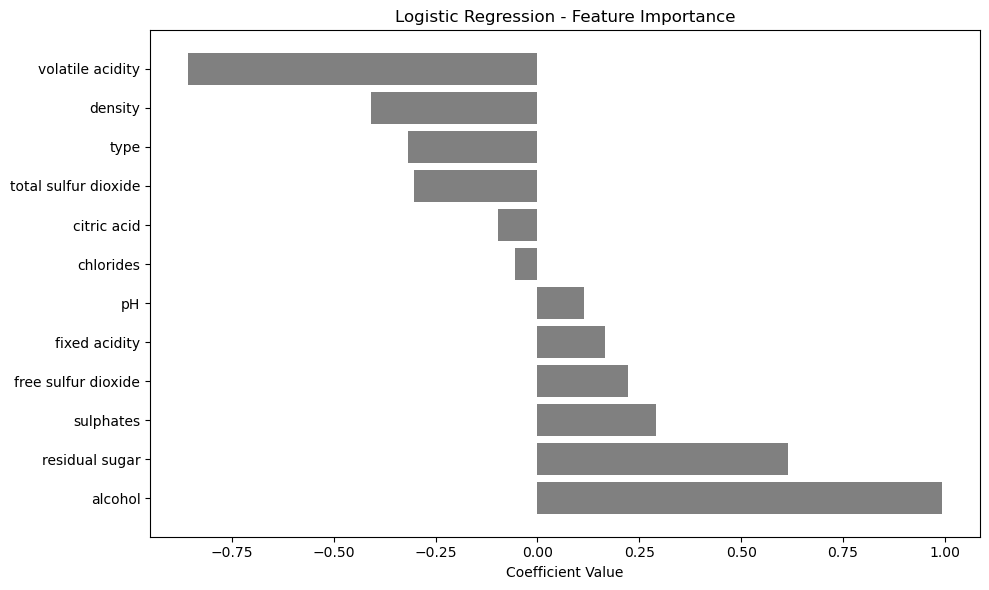

In [57]:
# Plot
plt.figure(figsize=(10,6))
plt.barh(lr_importance['Feature'], lr_importance['Coefficient'], color='gray')
plt.xlabel('Coefficient Value')
plt.title('Logistic Regression - Feature Importance')
plt.tight_layout()
plt.show()

In [58]:
# Get feature importance from Decision Tree
dt_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nDecision Tree Feature Importance:")
print(dt_importance)


Decision Tree Feature Importance:
                 Feature  Importance
10               alcohol    0.522511
1       volatile acidity    0.296051
9              sulphates    0.046782
3         residual sugar    0.039361
8                     pH    0.029385
5    free sulfur dioxide    0.025311
6   total sulfur dioxide    0.022455
4              chlorides    0.012763
0          fixed acidity    0.005381
2            citric acid    0.000000
7                density    0.000000
11                  type    0.000000


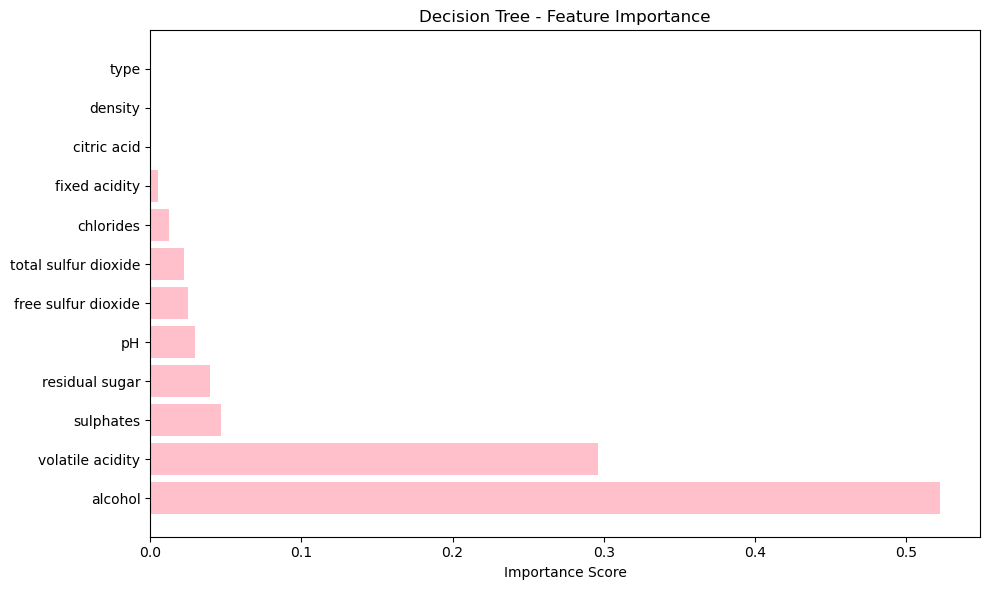

In [59]:
# Plot
plt.figure(figsize=(10,6))
plt.barh(dt_importance['Feature'], dt_importance['Importance'], color='pink')
plt.xlabel('Importance Score')
plt.title('Decision Tree - Feature Importance')
plt.tight_layout()
plt.show()

Both models agree that Alcohol is the most important feature. Volatile acidity and sulphates are also important.

======================================================================

Scenario 1: Testing a New Batch

In [65]:
print("="*70)
print("SCENARIO 1: BATCH QUALITY PREDICTION")
print("="*70)

# Simulate new wine batch
new_batch = pd.DataFrame({
    'fixed acidity': [7.5],
    'volatile acidity': [0.45],
    'citric acid': [0.35],
    'residual sugar': [2.2],
    'chlorides': [0.060],
    'free sulfur dioxide': [28.0],
    'total sulfur dioxide': [125.0],
    'density': [0.9940],
    'pH': [3.20],
    'sulphates': [0.70],
    'alcohol': [12.5],
    'type': [1]
})

print("\nChemical Test Results:")
print(f"  Alcohol: {new_batch['alcohol'].values[0]}%")
print(f"  Volatile Acidity: {new_batch['volatile acidity'].values[0]}")
print(f"  pH: {new_batch['pH'].values[0]}")

SCENARIO 1: BATCH QUALITY PREDICTION

Chemical Test Results:
  Alcohol: 12.5%
  Volatile Acidity: 0.45
  pH: 3.2


In [67]:
# Predict
batch_scaled = scaler.transform(new_batch)
prediction = lr_model.predict(batch_scaled)[0]
probability = lr_model.predict_proba(batch_scaled)[0]

print(f"\nModel Prediction: {'Good Quality' if prediction == 1 else 'Bad Quality'}")
print(f"Confidence: {probability[prediction]*100:.1f}%")

# Business decision
if prediction == 1 and probability[1] > 0.80:
    print("\n DECISION: Bottle as PREMIUM wine (£18-20/bottle)")
elif prediction == 1 and probability[1] > 0.60:
    print("\n DECISION: Request expert verification, consider STANDARD range")
else:
    print("\n DECISION: Do not bottle as premium - consider blending")

print("="*70)


Model Prediction: Good Quality
Confidence: 83.2%

 DECISION: Bottle as PREMIUM wine (£18-20/bottle)


Scenario 2: Multiple Batch Comparison

In [71]:
print("\n" + "="*70)
print("SCENARIO 2: COMPARING THREE BATCHES")
print("="*70)

# Create 3 test batches
batches = pd.DataFrame({
    'Batch_ID': ['A', 'B', 'C'],
    'fixed acidity': [7.2, 9.5, 6.8],
    'volatile acidity': [0.42, 0.88, 0.35],
    'citric acid': [0.38, 0.15, 0.45],
    'residual sugar': [2.8, 1.5, 3.2],
    'chlorides': [0.055, 0.085, 0.048],
    'free sulfur dioxide': [28.0, 15.0, 32.0],
    'total sulfur dioxide': [125.0, 98.0, 145.0],
    'density': [0.9938, 0.9965, 0.9932],
    'pH': [3.22, 3.55, 3.18],
    'sulphates': [0.72, 0.48, 0.78],
    'alcohol': [12.8, 9.5, 13.2],
    'type': [1, 0, 1]
})

results = []
for idx in range(len(batches)):
    batch_id = batches.loc[idx, 'Batch_ID']
    
    # Select row as DataFrame (keeps column names)
    features = batches.loc[[idx]].drop('Batch_ID', axis=1)
    
    # Scale and predict
    features_scaled = scaler.transform(features)
    pred = lr_model.predict(features_scaled)[0]
    prob = lr_model.predict_proba(features_scaled)[0]
    
    results.append({
        'Batch': batch_id,
        'Prediction': 'Good' if pred == 1 else 'Bad',
        'Confidence': f"{prob[pred]*100:.0f}%",
        'Action': 'Premium' if pred == 1 and prob[1] > 0.8 
                 else 'Standard' if pred == 1 
                 else 'Review/Blend'
    })

results_df = pd.DataFrame(results)
print("\n" + results_df.to_string(index=False))
print("="*70)


SCENARIO 2: COMPARING THREE BATCHES

Batch Prediction Confidence       Action
    A       Good        89%      Premium
    B        Bad        93% Review/Blend
    C       Good        95%      Premium


Scenario 3: Validation with Real Test Samples

In [74]:
print("\n" + "="*70)
print("SCENARIO 3: VALIDATING WITH REAL TEST SAMPLES")
print("="*70)

# Test 5 random samples from test set
sample_indices = np.random.choice(len(X_test), 5, replace=False)

for i, idx in enumerate(sample_indices, 1):
    sample = X_test.iloc[[idx]]  # Double brackets keep it as DataFrame
    actual = y_test.iloc[idx]
    
    print(f"\nSample {i}:")
    print(f"  Alcohol: {sample['alcohol'].values[0]:.1f}%")
    print(f"  Volatile Acidity: {sample['volatile acidity'].values[0]:.3f}")
    
    sample_scaled = scaler.transform(sample)
    prediction = lr_model.predict(sample_scaled)[0]
    prob = lr_model.predict_proba(sample_scaled)[0]
    
    print(f"  Actual: {'Good' if actual == 1 else 'Bad'}")
    print(f"  Predicted: {'Good' if prediction == 1 else 'Bad'} ({prob[prediction]*100:.0f}% confidence)")
    print(f"  {'✓ CORRECT' if prediction == actual else '✗ INCORRECT'}")



SCENARIO 3: VALIDATING WITH REAL TEST SAMPLES

Sample 1:
  Alcohol: 11.5%
  Volatile Acidity: 0.160
  Actual: Good
  Predicted: Good (92% confidence)
  ✓ CORRECT

Sample 2:
  Alcohol: 10.4%
  Volatile Acidity: 0.450
  Actual: Bad
  Predicted: Good (67% confidence)
  ✗ INCORRECT

Sample 3:
  Alcohol: 11.4%
  Volatile Acidity: 0.380
  Actual: Good
  Predicted: Good (86% confidence)
  ✓ CORRECT

Sample 4:
  Alcohol: 12.0%
  Volatile Acidity: 0.680
  Actual: Good
  Predicted: Bad (56% confidence)
  ✗ INCORRECT

Sample 5:
  Alcohol: 11.0%
  Volatile Acidity: 0.190
  Actual: Good
  Predicted: Good (86% confidence)
  ✓ CORRECT
